<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_3_Segmentaci%C3%B3n_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sesión 3: Segmentación RFM**
<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

#**SEGMENTACIÓN RFM**


De acuerdo con Chen et al. (2012), el análisis RFM (Recency, Frequency, Monetary) es un enfoque basado en el comportamiento de agrupar clientes en segmentos. Agrupa a los clientes en función de sus transacciones de compra anteriores, es decir, qué tan recientemente, con qué frecuencia y cuánto compró un cliente. 

RFM segmenta a los clientes en varios grupos o grupos y ayuda a los gerentes a identificar segmentos más importantes / rentables para enfocar su atención y esfuerzo. También ayuda a los especialistas en marketing a identificar a los clientes que tienen más probabilidades de responder a las promociones y también a los servicios de personalización futuros.

1. Recency (R): ¿Quién ha comprado recientemente? Significa el número de días desde la última compra (menos reciente es mejor)
2. Frecuencia (F): ¿Quién ha comprado con frecuencia? Significa el número total de compras. (alta frecuencia es mejor)
3. Monetario (M): ¿Quién tiene un alto monto de compra? Significa el dinero total gastado por el cliente (mejor monetario es mejor)

El análisis RFM se basa en el principio de Pareto de que el 80% de su negocio proviene del 20% de sus clientes. 

In [ ]:
#Importamos librerías
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt

In [ ]:
#Importamos la data
url = 'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/Data_CLV.csv'
df = pd.read_csv(url,encoding='latin1')

In [ ]:
# Hacemos un resumen de la info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275081 entries, 0 to 275080
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    275081 non-null  object 
 1   StockCode    275081 non-null  object 
 2   Description  274597 non-null  object 
 3   Quantity     275081 non-null  int64  
 4   InvoiceDate  275081 non-null  object 
 5   UnitPrice    275081 non-null  float64
 6   CustomerID   216276 non-null  float64
 7   Country      275081 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 16.8+ MB


**Verificar valores perdidos**

Las columnas que se requieren para el análisis RFM son Número de factura, Cantidad, Fecha de Factura, Precio de Unidad e ID de Cliente. Necesitamos asegurarnos de que no haya valores faltantes en estas columnas o que se traten antes del análisis.

In [ ]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      484
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     58805
Country            0
dtype: int64

Nota: Hay 58 805 valores faltantes para la columna CustomerID que es importante para el análisis RFM. En este caso, no hay mucho que podamos hacer, ya que los CustomerID son valores únicos, no tiene sentido imputar los valores faltantes con valores calculados. Por lo tanto, solo trabajaremos con la parte del marco de datos sin valores faltantes

In [ ]:
#Eliminamos los valores perdidos del CustomerID
df_data = df[pd.notnull(df["CustomerID"])]
df_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Podemos verificar cualquier valor duplicado en el marco de datos usando la función .duplicated() y eliminarlos en consecuencia usando la función drop_duplicates ().

In [ ]:
print("Tenemos {} valores duplicados.".format(df_data.duplicated().sum()))
df_data[df_data.duplicated(keep=False)].head(10)

Tenemos 3091 valores duplicados.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17,560271,21985,PACK OF 12 HEARTS DESIGN TISSUES,1,17/07/2011 14:51,0.29,16474.0,United Kingdom
19,560271,21985,PACK OF 12 HEARTS DESIGN TISSUES,1,17/07/2011 14:51,0.29,16474.0,United Kingdom
20,560271,22614,PACK OF 12 SPACEBOY TISSUES,1,17/07/2011 14:51,0.29,16474.0,United Kingdom
22,560271,84279P,CHERRY BLOSSOM DECORATIVE FLASK,1,17/07/2011 14:51,3.75,16474.0,United Kingdom
24,560271,84279P,CHERRY BLOSSOM DECORATIVE FLASK,1,17/07/2011 14:51,3.75,16474.0,United Kingdom
37,560271,22517,CHILDS GARDEN RAKE PINK,1,17/07/2011 14:51,2.10,16474.0,United Kingdom
39,560271,22517,CHILDS GARDEN RAKE PINK,1,17/07/2011 14:51,2.10,16474.0,United Kingdom
48,560271,22614,PACK OF 12 SPACEBOY TISSUES,1,17/07/2011 14:51,0.29,16474.0,United Kingdom
741,560305,22382,LUNCH BAG SPACEBOY DESIGN,1,18/07/2011 10:49,1.65,16511.0,United Kingdom
747,560305,22939,APRON APPLE DELIGHT,1,18/07/2011 10:49,4.95,16511.0,United Kingdom


In [ ]:
filtered_data = df_data.drop_duplicates()

In [ ]:
# Revisamos nuevamente si hay duplicados
filtered_data.duplicated().sum()

0

**Insights**

Dado que los datos provienen de un minorista en línea, analizaremos de dónde provienen sus clientes, es decir, países

In [ ]:
# Elaboramos una distribución porcentual de clientes por países (Top 10)
filtered_data.Country.value_counts(normalize=True)[:10]

United Kingdom    0.887595
Germany           0.022947
France            0.021202
EIRE              0.021188
Spain             0.005915
Netherlands       0.005282
Switzerland       0.005132
Belgium           0.005019
Portugal          0.003687
Norway            0.003321
Name: Country, dtype: float64

Filtramos nuestra data sólo para clientes locales (Reino Unido)

In [ ]:
uk_data = filtered_data[filtered_data["Country"] == "United Kingdom"]

In [ ]:
# Hacemos un análisis descriptivo de la nueva data filtrada
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,189222.000000,189222.000000,189222.000000
mean,11.157646,3.041254,15537.984103
std,267.943092,22.030363,1581.723005
min,-80995.000000,0.000000,12747.000000
25%,2.000000,1.250000,14159.000000
50%,4.000000,1.690000,15514.000000
75%,12.000000,3.750000,16910.000000
max,80995.000000,4287.630000,18287.000000


In [ ]:
# Filtramos las facturas con descripción de cancelaciones
uk_data[uk_data["InvoiceNo"].str.startswith("C", na=False)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
346,C560289,22766,PHOTO FRAME CORNICE,-3,18/07/2011 10:14,2.95,16398.0,United Kingdom
347,C560289,84816,DANISH ROSE BEDSIDE CABINET,-1,18/07/2011 10:14,39.95,16398.0,United Kingdom
348,C560289,22197,POPCORN HOLDER,-7,18/07/2011 10:14,0.85,16398.0,United Kingdom
723,C560301,23198,PANTRY MAGNETIC SHOPPING LIST,-1,18/07/2011 10:34,1.45,14159.0,United Kingdom
766,C560317,22927,GREEN GIANT GARDEN THERMOMETER,-2,18/07/2011 10:54,5.95,15527.0,United Kingdom
767,C560317,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,18/07/2011 10:54,4.95,15527.0,United Kingdom
770,C560330,22374,AIRLINE BAG VINTAGE JET SET RED,-1,18/07/2011 11:10,4.25,17841.0,United Kingdom
771,C560330,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,-1,18/07/2011 11:10,2.10,17841.0,United Kingdom
772,C560330,22981,PANTRY APPLE CORER,-1,18/07/2011 11:10,1.45,17841.0,United Kingdom
773,C560331,22649,STRAWBERRY FAIRY CAKE TEAPOT,-1,18/07/2011 11:20,4.95,17706.0,United Kingdom


Nota: De los casos de cancelación anteriores, el número de factura comienza con "C" y la cantidad es un valor negativo, por lo tanto, estas transacciones canceladas deben eliminarse.

In [ ]:
# Filtramos sólo transacciones válidas
uk_data_valid = uk_data[~uk_data["InvoiceNo"].str.startswith("C", na=False)].copy()

In [ ]:
uk_data_valid.describe()


,Quantity,UnitPrice,CustomerID
count,185703.000000,185703.000000,185703.000000
mean,12.077613,2.850762,15540.934557
std,194.264032,14.264553,1582.353917
min,1.000000,0.000000,12747.000000
25%,2.000000,1.060000,14159.000000
50%,4.000000,1.690000,15522.000000
75%,12.000000,3.750000,16910.000000
max,80995.000000,3155.950000,18287.000000


**Calculamos valores de RFM**

Como se mencionó anteriormente, solo necesitamos cinco columnas de los datos sin procesar, es decir, CustomerID, InvoiceDate, InvoiceNo, Quantity y UnitPrice.

1. CustomerId definirá de manera única a nuestros clientes
2. InvoiceDate nos ayuda a calcular la antigüedad de la compra (Recency)
3. InvoiceNo nos ayuda a contar el número de veces que se realiza la transacción (Frecuencia)
4. La cantidad comprada en cada transacción y el Precio unitario de cada unidad ayudarán a calcular el monto total comprado (Monetario)

Para calcular la antigüedad, calculamos el número de días entre la fecha actual (es decir, hoy) y la fecha de la última compra de cada cliente. Primero definimos la fecha de hoy y luego obtenemos la función .max () de InvoiceDate para calcular el número de días entre hoy y la fecha de la última compra.

In [ ]:
# Cambiamos el formato de la fecha
uk_data_valid['InvoiceDate'] = pd.to_datetime(uk_data_valid['InvoiceDate'])

In [ ]:
# Revisamos el mínimo y máximo valor de fecha que tenemos en la data
uk_data_valid['InvoiceDate'].max(), uk_data_valid['InvoiceDate'].min()

(Timestamp('2011-12-10 17:19:00'), Timestamp('2011-01-08 08:30:00'))

In [ ]:
# supongamos que estamos haciendo este análisis al día siguiente después de que se generen estos datos
TODAY = dt.datetime(2011,12,11)

# Probamos la variable Recency
least_recency = TODAY - uk_data_valid['InvoiceDate'].max()#Más reciente
highest_recency = TODAY - uk_data_valid['InvoiceDate'].min()#Menos reciente
least_recency.days, highest_recency.days

(0, 336)

Nota: Para garantizar la precisión, seleccionaremos un cliente como sujeto de prueba para calcular el valor de RFM individualmente y luego realizaremos una verificación cruzada con los cálculos finales. Digamos que seleccionamos al cliente con CustomerID == 12747

In [ ]:
# Ejemplo de recency para el cliente CustomerID == 12747
test_recency = TODAY - uk_data_valid[uk_data_valid["CustomerID"] == 12747].InvoiceDate.max()
test_recency.days

23

**Frecuencia**

Para calcular la frecuencia, calculamos el número de compras para cada cliente.

In [ ]:
# Ejemplo de frecuencia para cliente CustomerID == 12747
print("Número de transacciones: ", len(uk_data_valid[uk_data_valid["CustomerID"] == 12747]))
uk_data_valid[uk_data_valid["CustomerID"] == 12747].head(10)

Número de transacciones:  40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
41486,563949,21754,HOME BUILDING BLOCK WORD,6,2011-08-22 10:38:00,5.95,12747.0,United Kingdom
41487,563949,48173C,DOORMAT BLACK FLOCK,2,2011-08-22 10:38:00,7.95,12747.0,United Kingdom
41488,563949,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2011-08-22 10:38:00,8.95,12747.0,United Kingdom
41489,563949,21745,GAOLERS KEYS DECORATIVE GARDEN,4,2011-08-22 10:38:00,3.75,12747.0,United Kingdom
41490,563949,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,12,2011-08-22 10:38:00,1.65,12747.0,United Kingdom
41491,563949,82484,WOOD BLACK BOARD ANT WHITE FINISH,24,2011-08-22 10:38:00,6.75,12747.0,United Kingdom
41492,563949,82494L,WOODEN FRAME ANTIQUE WHITE,12,2011-08-22 10:38:00,2.95,12747.0,United Kingdom
107828,569397,23200,JUMBO BAG PEARS,10,2011-04-10 08:26:00,2.08,12747.0,United Kingdom
107829,569397,23201,JUMBO BAG ALPHABET,10,2011-04-10 08:26:00,2.08,12747.0,United Kingdom
107830,569397,23199,JUMBO BAG APPLES,10,2011-04-10 08:26:00,2.08,12747.0,United Kingdom


In [ ]:
print("No de facturas únicas: ", uk_data_valid[uk_data_valid["CustomerID"] == 12747].InvoiceNo.unique().size)
uk_data_valid[uk_data_valid["CustomerID"] == 12747].InvoiceNo.unique()

No de facturas únicas:  4


array(['563949', '569397', '577104', '581163'], dtype=object)

Nota: Para CustomerID == 12747, aunque hay 40 registros de transacciones, pero en realidad solo hay 4 facturas únicas.

**Monetario**

Para calcular el valor monetario, calculamos la suma del precio de compra para cada cliente. Para hacer esto, creamos una nueva columna TotalPrice que es el producto de la Cantidad comprada en cada transacción y UnitPrice de cada unidad

In [ ]:
uk_data_valid['TotalPrice'] = uk_data_valid['Quantity'] * uk_data_valid['UnitPrice']

In [ ]:
uk_data_valid.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,560271,20719,WOODLAND CHARLOTTE BAG,1,2011-07-17 14:51:00,0.85,16474.0,United Kingdom,0.85
1,560271,20725,LUNCH BAG RED RETROSPOT,1,2011-07-17 14:51:00,1.65,16474.0,United Kingdom,1.65
2,560271,21745,GAOLERS KEYS DECORATIVE GARDEN,2,2011-07-17 14:51:00,3.75,16474.0,United Kingdom,7.50
3,560271,18094C,WHITE AND BLUE CERAMIC OIL BURNER,2,2011-07-17 14:51:00,1.25,16474.0,United Kingdom,2.50
4,560271,35648,VINTAGE BEAD PINK PURSE,1,2011-07-17 14:51:00,0.83,16474.0,United Kingdom,0.83
5,560271,35646,VINTAGE BEAD PINK EVENING BAG,2,2011-07-17 14:51:00,1.25,16474.0,United Kingdom,2.50
6,560271,21790,VINTAGE SNAP CARDS,1,2011-07-17 14:51:00,0.85,16474.0,United Kingdom,0.85
7,560271,21294,ETCHED GLASS COASTER,6,2011-07-17 14:51:00,0.39,16474.0,United Kingdom,2.34
8,560271,35646,VINTAGE BEAD PINK EVENING BAG,1,2011-07-17 14:51:00,1.25,16474.0,United Kingdom,1.25
9,560271,22457,NATURAL SLATE HEART CHALKBOARD,2,2011-07-17 14:51:00,2.95,16474.0,United Kingdom,5.90


In [ ]:
# Ejemplo de monetario para cada cliente CustomerID == 12747
uk_data_valid[uk_data_valid["CustomerID"] == 12747].TotalPrice.sum()

1728.31

Nota: Por lo tanto, para nuestro sujeto de prueba, CustomerID == 12747, los valores recientes, de frecuencia y monetarios son (23, 4, 1728.31)

**Agrupamos valores de RFM**

In [ ]:
rfm = uk_data_valid.groupby("CustomerID").agg({"InvoiceDate": lambda date: (TODAY - date.max()).days,
                                        "InvoiceNo": lambda num: num.nunique(),
                                        "TotalPrice": lambda price: price.sum()})

In [ ]:
# Cambiamos el nombre de las columnas
rfm.columns=["recency", "frequency", "monetary"]

In [ ]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12747.0,23,4,1728.31
12748.0,11,100,21087.13
12749.0,23,4,3231.78
12820.0,45,3,771.88
12822.0,71,2,948.88


Nota: Verificamos que para CustomerID == 12747, los valores de RFM (23, 4, 1728.31) coinciden con los valores de la fila 2 de la tabla anterior. Por lo tanto, esto indica que nuestros cálculos son correctos.

In [ ]:
print("Recency: {} al {}".format(rfm.recency.min(), rfm.recency.max()))
print("Frequency: {} al {}".format(rfm.frequency.min(), rfm.frequency.max()))
print("Monetary: {} al {}".format(rfm.monetary.min(), rfm.monetary.max()))

Recency: 0 al 336
Frequency: 1 al 100
Monetary: 0.0 al 168469.6


**Calculamos el cuartil de los valores RFM**

Usando el análisis RFM, los clientes con la menor antigüedad, la mayor frecuencia y los montos monetarios más altos se consideran los mejores clientes. Sin embargo, los valores de RFM por sí solos son difíciles de comprender para tantos clientes a la vez. 

Necesitamos segregar a los clientes en diferentes "CUBOS" en función de sus valores de RFM. Para hacer esto, podemos usar la función qcut (). Es una función de discretización basada en cuartiles que discretiza la variable en cubos de igual tamaño según el rango o según los cuantiles de muestra. Por ejemplo, 1000 valores para 4 cuantiles producirían un objeto categórico que indica el cuartil para cada cliente. 

In [ ]:
rfm["r_quartile"] = pd.qcut(rfm["recency"], 4, ["1","2","3","4"])

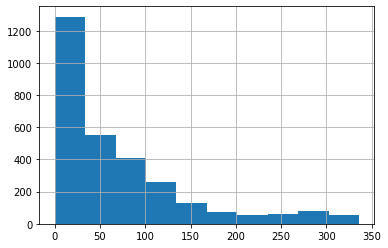

In [ ]:
rfm['recency'].hist()

In [ ]:
rfm["f_quartile"] = pd.qcut(rfm["frequency"], 4, ["4","3","2","1"])

ValueError: ignored

In [ ]:
rfm["r_quartile"] = pd.qcut(rfm["recency"], 4, ["1","2","3","4"])
rfm["f_quartile"] = pd.qcut(rfm["frequency"], 4, ["3","2","1"], duplicates="drop")
rfm["m_quartile"] = pd.qcut(rfm["monetary"], 4, ["4","3","2","1"])

In [ ]:
rfm.head(5)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12747.0,23,4,1728.31,2,1,1
12748.0,11,100,21087.13,1,1,1
12749.0,23,4,3231.78,2,1,1
12820.0,45,3,771.88,2,2,2
12822.0,71,2,948.88,3,3,2


In [ ]:
#Combinamos los tres cuartiles en una sola columna para ayudar a clasificar a los clientes por segmentos
rfm["RFM_Score"] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12747.0,23,4,1728.31,2,1,1,211
12748.0,11,100,21087.13,1,1,1,111
12749.0,23,4,3231.78,2,1,1,211
12820.0,45,3,771.88,2,2,2,222
12822.0,71,2,948.88,3,3,2,332


Nota: Vemos que el cliente CustomerID == 12748, cuenta con un valor de 1 en las tres dimensiones Recency, Frequency y Monetary con un puntaje RFM de "111". Sería útil clasificar el puntaje de RFM para identificar a los 10 principales clientes..

In [ ]:
# Filtramos a los 10 principales clientes seleccionando Puntaje RFM = 111 y luego ordenar por valores monetarios y de frecuencia descendentes
rfm[rfm["RFM_Score"]=="111"].sort_values(by=["monetary", "frequency"], ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,12,38,139773.75,1,1,1,111
17450.0,11,29,128193.63,1,1,1,111
14096.0,12,17,65164.79,1,1,1,111
17511.0,17,14,48740.10,1,1,1,111
16684.0,12,15,41577.62,1,1,1,111
14088.0,11,9,35103.81,1,1,1,111
17949.0,18,23,28164.12,1,1,1,111
13089.0,12,37,25566.81,1,1,1,111
17389.0,15,14,24620.58,1,1,1,111


El resultado final anterior muestra a los 10 mejores clientes con el mejor puntaje RFM de 111, lo que significa que están en el primer cuartil para las tres dimensiones recientes, de frecuencia y monetarias. Esto indica que tienen la Recency más baja, la Frecuencia más alta y los valores monetarios más altos. Las empresas deberían centrar más su atención y recursos en este segmento de clientes que probablemente generará más rentabilidad.

**Podemos encontrar aquí una sugerencia de segmentos clave y luego podemos decidir qué segmento considerar para un estudio posterior.**

Nota: 1 es el puntaje más alto / mejor y 4 es el más bajo.

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2953 entries, 12747.0 to 18287.0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   recency     2953 non-null   int64   
 1   frequency   2953 non-null   int64   
 2   monetary    2953 non-null   float64 
 3   r_quartile  2953 non-null   category
 4   f_quartile  2953 non-null   category
 5   m_quartile  2953 non-null   category
 6   RFM_Score   2953 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 124.5+ KB


In [ ]:
rfm['RFM_Score']=rfm['RFM_Score'].astype(float)

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2953 entries, 12747.0 to 18287.0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   recency     2953 non-null   int64   
 1   frequency   2953 non-null   int64   
 2   monetary    2953 non-null   float64 
 3   r_quartile  2953 non-null   category
 4   f_quartile  2953 non-null   category
 5   m_quartile  2953 non-null   category
 6   RFM_Score   2953 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 124.5 KB


In [ ]:
#Propongo una función que me genere una segmentación en base al RFM obtenido
def cluster(rfm):
            if rfm['RFM_Score'] <=111:
              return 'Mejores clientes'
            else: 
              if rfm['RFM_Score'] <=222:
                return 'Buenos clientes'
              elif rfm['RFM_Score'] <=333:
                return 'Regulares clientes'
              else:
                return 'Malos clientes'

In [ ]:
#Aplico la función generada para crear una nueva columna con el nombre de cada clúster
rfm['cluster']=rfm.apply(cluster, axis=1)

In [ ]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,cluster
CustomerID,,,,,,,,
12747.0,23,4,1728.31,2,1,1,211.0,Buenos clientes
12748.0,11,100,21087.13,1,1,1,111.0,Mejores clientes
12749.0,23,4,3231.78,2,1,1,211.0,Buenos clientes
12820.0,45,3,771.88,2,2,2,222.0,Buenos clientes
12822.0,71,2,948.88,3,3,2,332.0,Regulares clientes


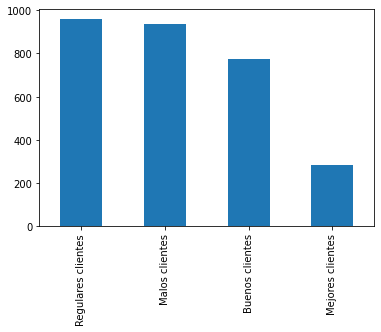

In [ ]:
#Realizo una gráfica de barras para observar la distribución por segmento
rfm['cluster'].value_counts().plot(kind='bar')

Puedo obtener los promedios de compra total en el periodo seleccionado por cluster

In [ ]:
rfm.groupby('cluster')['monetary'].mean().sort_values(ascending=False)

cluster
Mejores clientes      5425.095654
Buenos clientes       1271.720103
Regulares clientes     934.684558
Malos clientes         429.398633
Name: monetary, dtype: float64

El análisis RFM es ampliamente utilizado por su fácil compresión y aplicabilidad. Permite conocer el comportamiento de compra de los clientes según unos parámetros básicos, en busca de la identificación de aquellos clientes que aportan mayor valor a la empresa. Adicionalmente, este análisis se puede complementar con otras técnicas como técnicas de manipulación de datos, métodos gráficos de visualización, métodos de agrupación, junto con la introducción de nuevas variables, para obtener un análisis adaptado a las necesidades particulares de una empresa o industria.